# pandas-ml-qunat - The Pandas Machine Leraning and Quant Finance Library

This is the root repository of the follwoing 3 core components:

* pandas-ml-common - a more general utilities and monkey patched pandas objects provider
* pandas-ml-quant - provides technical analysis inidcators, plots, loss functions, etc.
* pandas-ml-utils - apply statistical or ml models directly to data frames

## Demonstration of all 3 libraries used together
### First import needed objects

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import sys
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from pandas_ml_utils.ml.data.extraction import extract_with_post_processor
from pandas_ml_utils.ml.summary import ClassificationSummary
from pandas_ml_utils import FeaturesAndLabels, Model, SkModel
from pandas_ml_quant import pd, np

automatically imported pandas_ml_utils 0.1.0


### Next fetch some stock data and plot it

Note that:
1. all indicators and charting functionalities are behind the **q**and property attached to all pandas objects
1. the **m**achine**l**earning proptery provides access to (raw) data as it is useful/needed by statistical and ml models
1. all model relevant functionalities are behind the **model** property


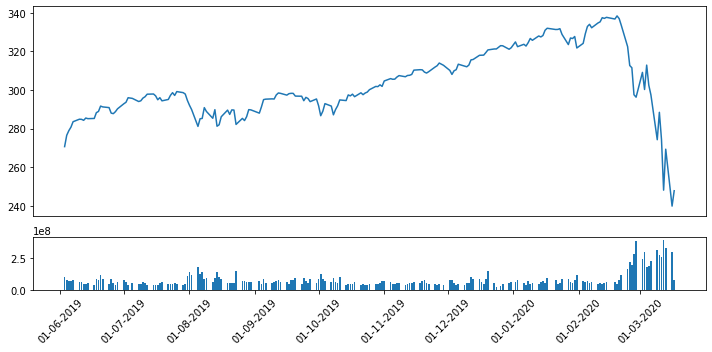

In [2]:
df = pd.fetch_yahoo("SPY").loc[:'2020-03-17']

# NOTE the access to the q_uant property
df[-200:].q.ta_plot(figsize=(10, 5))()

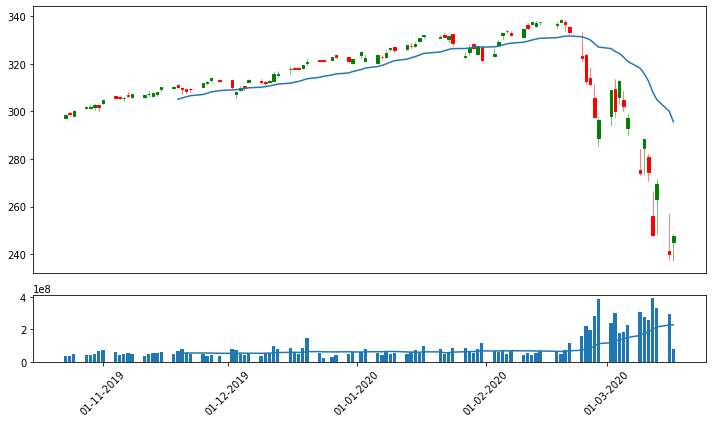

In [3]:
plt = df[-100:].q.ta_plot(figsize=(10, 6))
plt.candlestick()
plt.line(df[-100:]["Close"].q.ta_sma(period=20))
plt.bar("Volume")
plt.line(df[-100:]["Volume"].q.ta_sma(period=20), panel=1)

### Next think of a predictive model
Lets say we want to predict in which quantile of a bolliner bands indicator the price in the future will be:
* 0 means below lower band
* 1 means in the middle band
* 2 means above the upper band


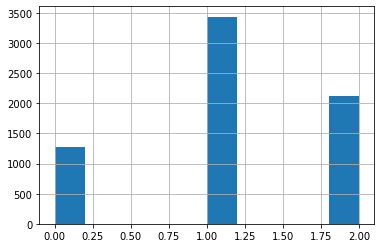

In [4]:
# NOTE all technical analysis starts with the "ta_" prefix
df["Close"].q.ta_future_bband_quantile(5, 5).hist()

And we want to predict this binary event based on a set of indicators like the RSI (Relative Strength Index) and such.

So we can build up a features and labels definition like so:

In [5]:
fnl = FeaturesAndLabels(
    features=[
        lambda df: df["Close"].q.ta_macd(),
        lambda df: df["Close"].q.ta_apo(),
        lambda df: df["Close"].q.ta_rsi(),
        lambda df: df["Close"].q.ta_roc(),
        lambda df: df["Close"].q.ta_trix(),
        lambda df: df["Close"].q.ta_ppo(),
        lambda df: df["Close"].pct_change().q.ta_zscore() / 4.,
        lambda df: df["Close"].q.ta_week_day(),
        lambda df: df["Close"].q.ta_week(),
        lambda df: df["Close"].q.ta_up_down_volatility_ratio(),
        lambda df: df.q.ta_adx(), 
        lambda df: df.q.ta_atr(),
        lambda df: df.q.ta_tr(),
        lambda df: df.q.ta_williams_R(),
        lambda df: df.q.ta_ultimate_osc(),
        lambda df: df.q.ta_bop(),
        lambda df: df.q.ta_cci(),
    ],
    labels=[
        lambda df: df["Close"].q.ta_future_bband_quantile(5, 5)
    ]
)

# NOTE the df.ml property provides access to (raw) data as it is useful/needed by statistical models
features, labels, targets, weights = df.ml.extract(fnl)
features.describe()

  res = df.rolling(period).apply(lambda c: zscore(c, ddof=ddof)[-1])

  md = tp.rolling(period).apply(lambda x: _np.abs(x - x.mean()).sum() / period)



,"macd_12,26,9","signal_12,26,9","histogram_12,26,9","Close_apo_12,26,0",Close_rsi_14,Close_roc_10,Close_trix_30,"Close_ppo_12,26,1",Close_z_20,dow,...,-DM,+DI,-DI,ADX,atr_14,true_range,williams_R_14,"ultimate_osc_7,14,28",bop,cci_14
count,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,...,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000,6701.000000
mean,0.002428,0.002455,-0.000027,1.002530,0.549254,0.003955,0.036913,0.002428,-0.007609,0.336766,...,0.003474,0.002993,0.002841,0.231648,1.493245,1.519245,0.377865,0.546763,0.035703,0.239550
std,0.010959,0.010229,0.003366,0.015304,0.113880,0.031600,0.104855,0.010959,0.246428,0.233432,...,0.002775,0.002434,0.002135,0.083995,0.966269,1.449451,0.301485,0.101956,0.535269,1.052770
min,-0.074439,-0.067679,-0.026184,0.891753,0.167987,-0.267695,-0.558651,-0.074439,-0.972346,0.000000,...,0.000385,0.000195,0.000205,0.076091,0.147346,0.040000,0.000000,0.213749,-1.000000,-3.522097
25%,-0.002281,-0.001866,-0.001828,0.995333,0.468654,-0.010859,-0.004704,-0.002281,-0.160231,0.166667,...,0.001729,0.001473,0.001468,0.168688,0.906922,0.750000,0.104977,0.474867,-0.418182,-0.568568
50%,0.004359,0.004182,-0.000021,1.004710,0.557254,0.006616,0.053165,0.004359,-0.008159,0.333333,...,0.002673,0.002293,0.002269,0.217181,1.332781,1.200000,0.306748,0.550373,0.053333,0.463470
75%,0.009252,0.008945,0.001734,1.011820,0.634055,0.021488,0.100333,0.009252,0.153127,0.500000,...,0.004238,0.003371,0.003373,0.279013,1.849285,1.860000,0.628466,0.621073,0.500000,1.054928
max,0.030255,0.026989,0.018455,1.059521,0.872283,0.215963,0.248463,0.030255,0.839008,0.666667,...,0.027597,0.015448,0.017921,0.590979,13.752851,31.960000,1.000000,0.846781,1.000000,3.215749


Since we have no idea which features are actually "good" to predict the label, we want to do some feature analysis fist.


  res = df.rolling(period).apply(lambda c: zscore(c, ddof=ddof)[-1])

  md = tp.rolling(period).apply(lambda x: _np.abs(x - x.mean()).sum() / period)



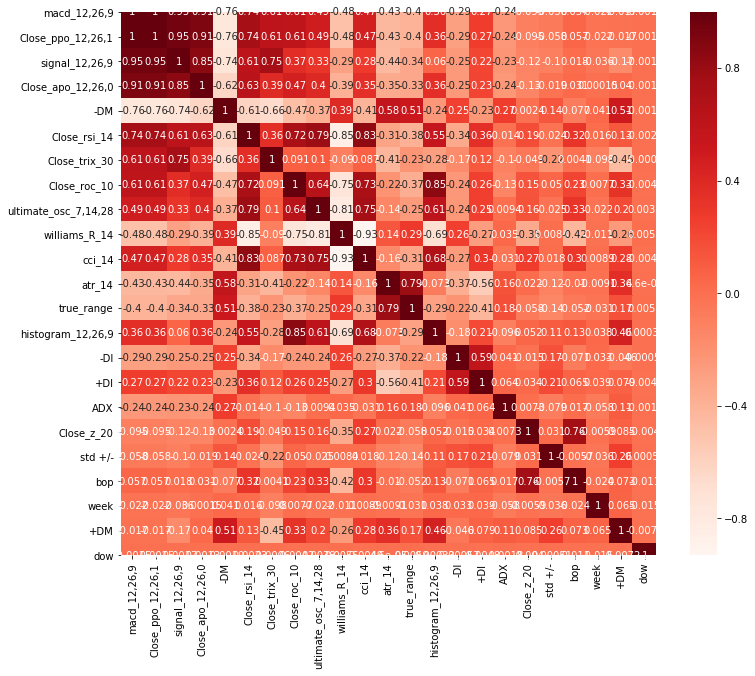

  forest.fit(x, y)



              macd_12,26,9  Close_ppo_12,26,1  signal_12,26,9  \
macd_12,26,9           1.0                1.0        0.951831   

              Close_apo_12,26,0       -DM  Close_rsi_14  Close_trix_30  \
macd_12,26,9           0.906638 -0.762968      0.744044       0.614794   

              Close_roc_10  ultimate_osc_7,14,28  williams_R_14  ...  \
macd_12,26,9      0.605845              0.490602      -0.483855  ...   

              histogram_12,26,9       -DI       +DI      ADX  Close_z_20  \
macd_12,26,9           0.363206 -0.286639  0.268477 -0.24227   -0.094542   

               std +/-       bop      week      +DM      dow  
macd_12,26,9 -0.058172  0.056719 -0.021847 -0.01716 -0.00147  

[1 rows x 23 columns]
label is continuous: False


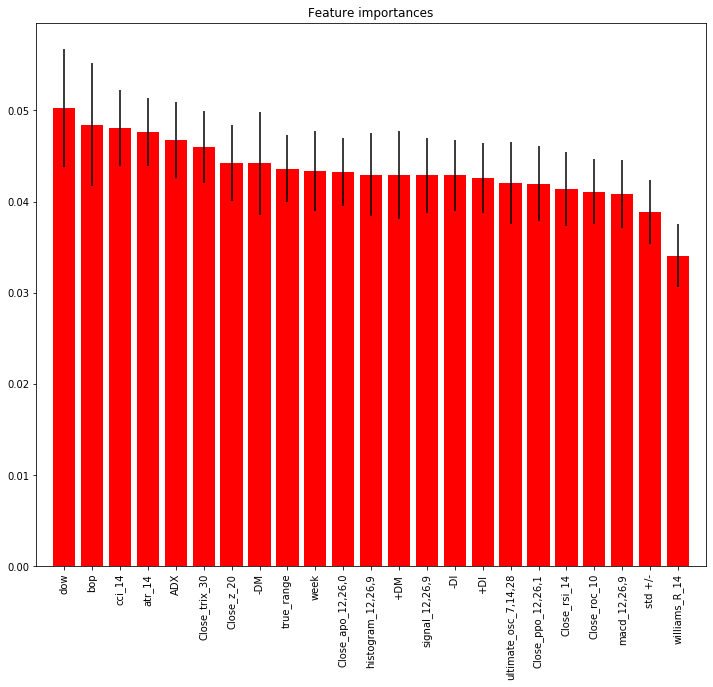

Feature ranking:
['dow', 'bop', 'cci_14', 'atr_14', 'ADX', 'Close_trix_30', 'Close_z_20', '-DM', 'true_range', 'week', 'Close_apo_12,26,0', 'histogram_12,26,9', '+DM', 'signal_12,26,9', '-DI', '+DI', 'ultimate_osc_7,14,28', 'Close_ppo_12,26,1', 'Close_rsi_14', 'Close_roc_10', 'macd_12,26,9', 'std +/-', 'williams_R_14']

TOP 5 features
     dow       bop    cci_14    atr_14       ADX
dow  1.0 -0.010693 -0.004886  0.000046 -0.001839
Features after correlation filer:
                  dow       bop    cci_14      ADX    atr_14
macd_12,26,9 -0.00147  0.056719  0.466429 -0.24227 -0.432935


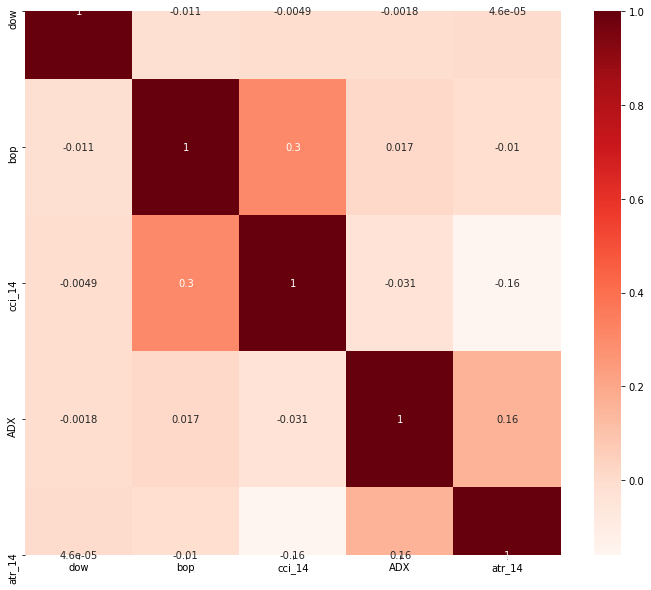

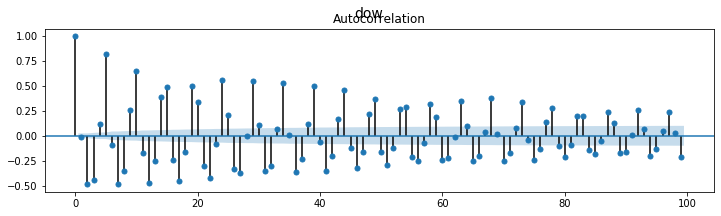

dow       1.000000
dow_0     1.000000
dow_5     0.821520
dow_10    0.653132
dow_24    0.563266
dow_29    0.553152
dow_34    0.530481
dow_19    0.505366
dow_39    0.499970
dow_15    0.489215
Name: dow, dtype: float64


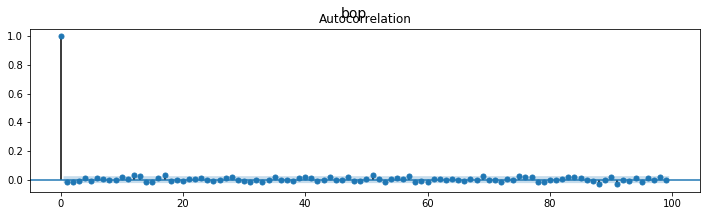

bop       1.000000
bop_0     1.000000
bop_51    0.033801
bop_17    0.031608
bop_12    0.031001
bop_75    0.025456
bop_57    0.024410
bop_69    0.023326
bop_13    0.022359
bop_84    0.021451
Name: bop, dtype: float64


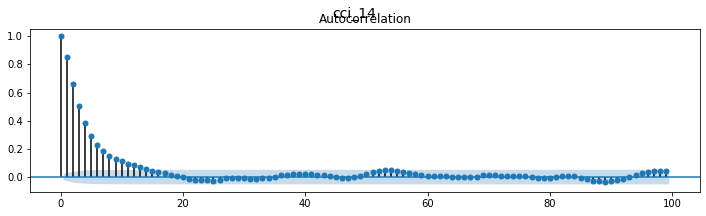

cci_14      1.000000
cci_14_0    1.000000
cci_14_1    0.850547
cci_14_2    0.661111
cci_14_3    0.506836
cci_14_4    0.385676
cci_14_5    0.291317
cci_14_6    0.226069
cci_14_7    0.182040
cci_14_8    0.150719
Name: cci_14, dtype: float64


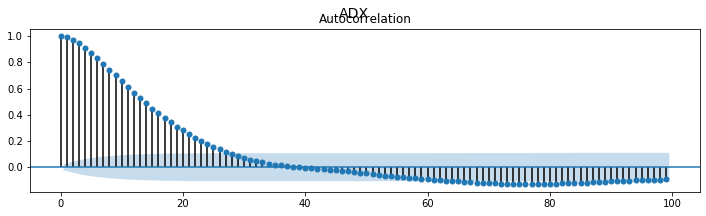

ADX      1.000000
ADX_0    1.000000
ADX_1    0.992817
ADX_2    0.974066
ADX_3    0.946771
ADX_4    0.913169
ADX_5    0.875122
ADX_6    0.834091
ADX_7    0.791166
ADX_8    0.747156
Name: ADX, dtype: float64


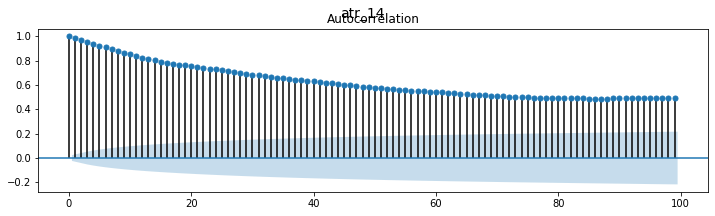

atr_14      1.000000
atr_14_0    1.000000
atr_14_1    0.997425
atr_14_2    0.992820
atr_14_3    0.986328
atr_14_4    0.978406
atr_14_5    0.969552
atr_14_6    0.959746
atr_14_7    0.949238
atr_14_8    0.938721
Name: atr_14, dtype: float64
best lags are
[(1, '-1.00'), (6, '-0.59'), (2, '-0.56'), (5, '-0.48'), (11, '-0.47'), (3, '-0.43'), (10, '-0.40'), (4, '-0.40'), (7, '-0.39'), (16, '-0.36'), (15, '-0.36'), (20, '-0.33'), (25, '-0.30'), (9, '-0.30'), (12, '-0.29'), (8, '-0.29'), (21, '-0.29'), (30, '-0.28'), (35, '-0.25'), (14, '-0.25'), (40, '-0.25'), (45, '-0.23'), (26, '-0.22'), (13, '-0.22'), (17, '-0.21'), (19, '-0.21'), (50, '-0.19'), (31, '-0.18'), (24, '-0.18'), (55, '-0.18'), (29, '-0.18'), (54, '-0.17'), (64, '-0.17'), (59, '-0.17'), (44, '-0.17'), (39, '-0.17'), (69, '-0.17'), (18, '-0.16'), (49, '-0.16'), (34, '-0.16'), (74, '-0.16'), (36, '-0.15'), (22, '-0.15'), (98, '-0.15'), (60, '-0.14'), (93, '-0.14'), (79, '-0.13'), (41, '-0.13'), (84, '-0.13'), (83, '-0.13'), (88, 

In [6]:
features, lags = df.model.feature_selection(fnl)

In [7]:
features

['dow', 'bop', 'cci_14', 'atr_14', 'ADX']

Looks like 'cci_14', 'atr_14', 'Close_trix_30', 'ADX', 'Close_z_20' are the top 5 features to predict the label .

So now we can build up a model from the learnings we have made.

In [8]:
from pandas_ml_utils.ml.data.sampeling import KFoldBoostRareEvents, KEquallyWeightEvents

fit = df.model.fit(
    SkModel(
        MLPClassifier(activation='tanh', hidden_layer_sizes=(60, 50), random_state=42),
        FeaturesAndLabels(
            features=extract_with_post_processor(
                [
                    #lambda df: df["Close"].q.ta_macd(),
                    #lambda df: df["Close"].q.ta_apo(),
                    #lambda df: df["Close"].q.ta_rsi(),
                    #lambda df: df["Close"].q.ta_roc(),
                    #lambda df: df["Close"].q.ta_trix(),
                    #lambda df: df["Close"].q.ta_ppo(),
                    #lambda df: df["Close"].pct_change().q.ta_zscore() / 4.,
                    lambda df: df["Close"].q.ta_week_day(),
                    #lambda df: df["Close"].q.ta_week(),
                    #lambda df: df["Close"].q.ta_up_down_volatility_ratio(),
                    lambda df: df.q.ta_adx()[["ADX"]], 
                    lambda df: df.q.ta_atr(),
                    #lambda df: df.q.ta_tr(),
                    #lambda df: df.q.ta_williams_R(),
                    #lambda df: df.q.ta_ultimate_osc(),
                    lambda df: df.q.ta_bop(),
                    lambda df: df.q.ta_cci(),
                ],
                lambda df: df.q.ta_rnn(lags)
            ),
            labels=[
                lambda df: df["Close"].q.ta_future_bband_quantile(5, 5, stddev=2.0).q.ta_one_hot_encode_discrete()

            ],
            targets=[
                lambda df: df["Close"].q.ta_bbands(5, stddev=2.0)[["lower", "upper"]]
            ],
            min_required_samples=max(lags)+1
        ),
        summary_provider=ClassificationSummary,
    ),
    test_size=0.4, 
    test_validate_split_seed=42, 
)

fit

  md = tp.rolling(period).apply(lambda x: _np.abs(x - x.mean()).sum() / period)



 .. bla bla ... bla ...

Ok now if we want to know what the current prediction is for the next 5 days, we simply call

```python
df.model.predict(fit.model)[-1:]["prediction"]
# [[6.13729022e-06, 9.99999839e-01, 1.07792629e-08]]
```

Oh wait now we know that we expect the price to be in the middle band but what does this actually mean? Which values are the middle band?
This is where the target comes into play.

In [12]:
df.model.predict(fit.model, tail=300).map_prediction_to_target()

  md = tp.rolling(period).apply(lambda x: _np.abs(x - x.mean()).sum() / period)



prediction
2019-02-14 (-inf, 263.55)    4.975645e-03
           (263.55, 272.13)  2.457438e-04
           (272.13, inf)     9.913326e-01
2019-02-15 (-inf, 264.44)    5.395354e-04
           (264.44, 273.96)  6.552115e-04
...                                   ...
2020-03-16 (224.42, 303.61)  1.000000e+00
           (303.61, inf)     2.402157e-11
2020-03-17 (-inf, 225.81)    1.019547e-03
           (225.81, 285.97)  1.000000e+00
           (285.97, inf)     1.115916e-10

[822 rows x 1 columns]

In [ ]:
from pandas_ml_utils.ml.data.sampeling import KFoldBoostRareEvents, KEquallyWeightEvents
from pandas_ml_utils import KerasModel

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Reshape, ActivityRegularization
from keras.callbacks import EarlyStopping
from keras import backend as K 

# first clear tensorflow session
K.clear_session()

return

def provider():
    # create model
    model = Sequential()
    model.add(Reshape((101 * 11, ), input_shape=(101, 11)))
    # model.add(ActivityRegularization(l1=0.002))
    model.add(Dense(60, activation='tanh'))
    model.add(Dense(50, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='mse',
                  optimizer=Adam(lr=0.0001), 
                  metrics=['accuracy'],
                 )
    
    return model
    
fit = df.model.fit(
    KerasModel(
        provider,
        FeaturesAndLabels(
            features=extract_with_post_processor(
                [
                    lambda df: df.q.ta_cci(),
                    lambda df: df.q.ta_atr(),
                    lambda df: df.q.ta_adx(),
                    lambda df: df["Close"].q.ta_trix(),
                ],
                lambda df: df.q.ta_rnn(lags)
            ),
            labels=[
                lambda df: df["Close"].q.ta_future_pct_to_current_mean(14, 5) > 0

            ],
            min_required_samples=max(lags)
        ),
        summary_provider=ClassificationSummary,
        # keras fit parameters
        verbose=0,
        batch_size=128,
        callbacks=[lambda: EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)], 
    ),
    test_size=0.4, 
    test_validate_split_seed=42, 
    cross_validation=(1, KFoldBoostRareEvents(n_splits=3).split),
    
)

fit